In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [4]:
train.columns.sort

<bound method Index.sort of Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
    

<AxesSubplot:xlabel='SalePrice'>

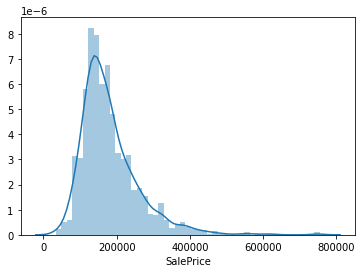

In [5]:
sns.distplot(train['SalePrice'])

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

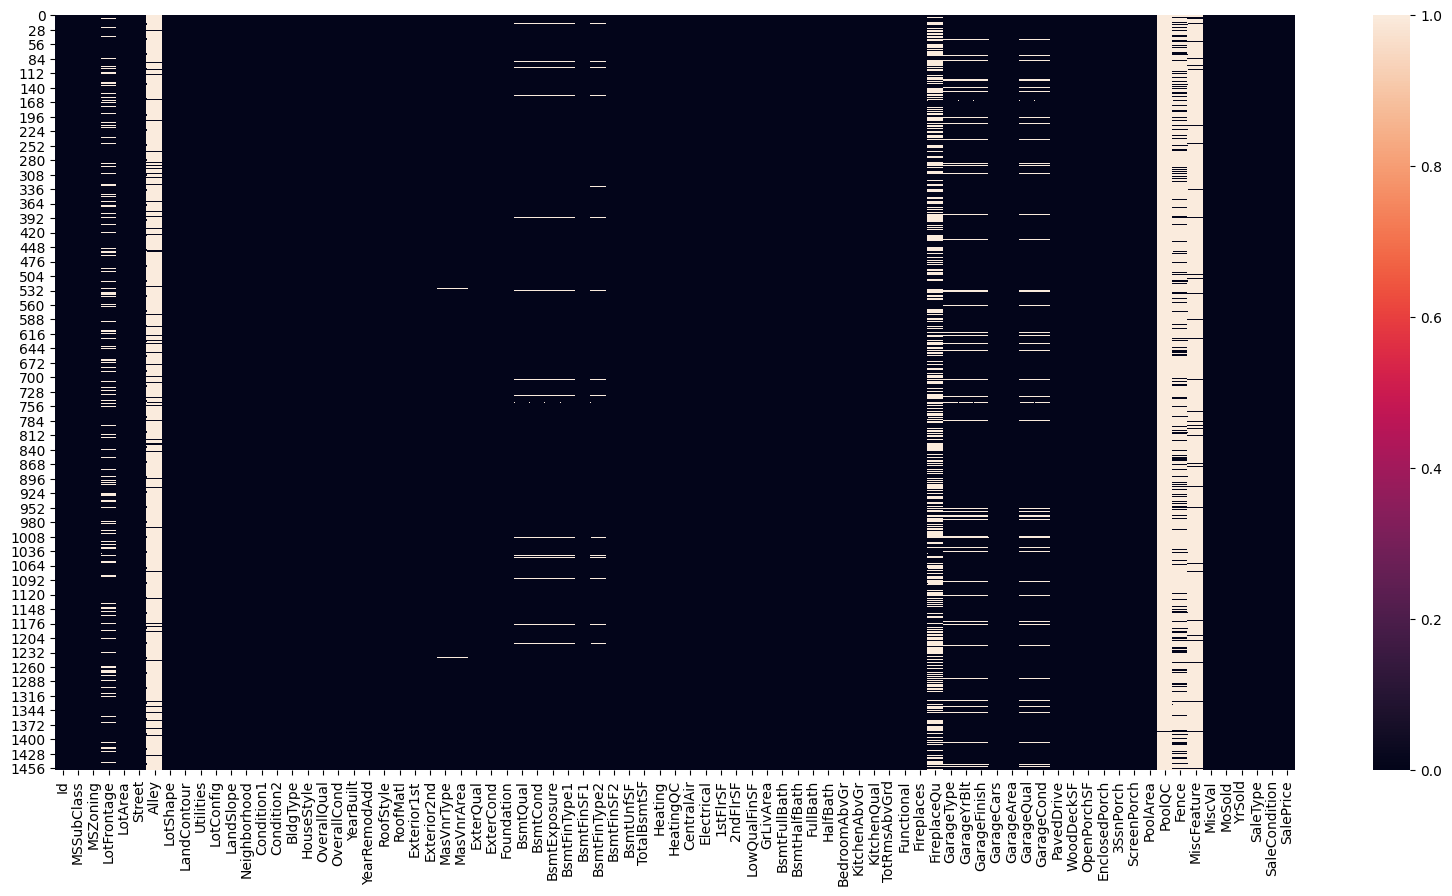

In [8]:
plt.figure(figsize=(20, 10), dpi=100)
sns.heatmap(train.isnull())

<AxesSubplot:>

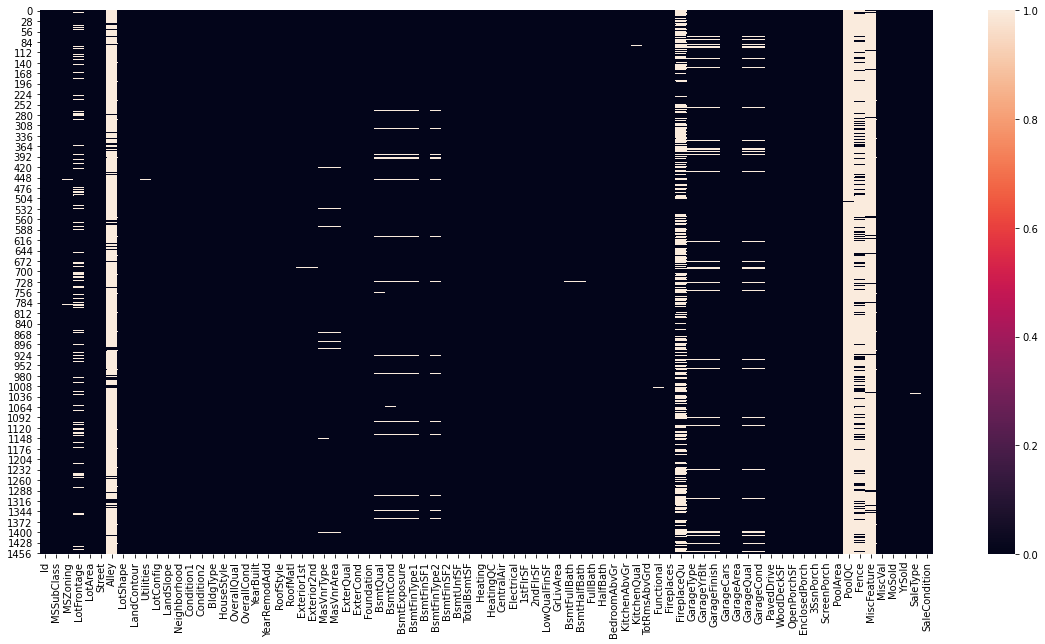

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(test.isnull())

In [10]:
train.drop(["Alley", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)
test.drop(["Alley", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

In [11]:
train.LotFrontage.fillna(train.LotFrontage.dropna().mode()[0], inplace=True)
test.LotFrontage.fillna(test.LotFrontage.dropna().mode()[0], inplace=True)

In [12]:
train.FireplaceQu.fillna(train["FireplaceQu"].dropna().mode()[0], inplace=True)
test.FireplaceQu.fillna(test["FireplaceQu"].dropna().mode()[0], inplace=True)

In [13]:
test["MSZoning"].fillna(test["MSZoning"].dropna().mode()[0], inplace=True)

In [14]:
train.LotFrontage.fillna(train.LotFrontage.dropna().mean(), inplace=True)
test.LotFrontage.fillna(test.LotFrontage.dropna().mean(), inplace=True)

In [15]:
test.Utilities.fillna(test.Utilities.dropna().mode()[0], inplace=True)

In [16]:
test.Exterior2nd.fillna(test.Exterior2nd.dropna().mode()[0], inplace=True)

In [17]:
test.Exterior1st.fillna(test.Exterior1st.dropna().mode()[0], inplace=True)

In [18]:
train.GarageType.fillna(train.GarageType.dropna().mode()[0], inplace=True)
test.GarageType.fillna(test.GarageType.dropna().mode()[0], inplace=True)

In [19]:
train.GarageYrBlt.fillna(train.GarageYrBlt.dropna().mean(), inplace=True)
test.GarageYrBlt.fillna(train.GarageYrBlt.dropna().mean(), inplace=True)

In [20]:
train.GarageFinish.fillna(train.GarageFinish.dropna().mode()[0], inplace=True)
test.GarageFinish.fillna(test.GarageFinish.dropna().mode()[0], inplace=True)

In [21]:
train.GarageQual.fillna(train.GarageQual.dropna().mode()[0], inplace=True)
test.GarageQual.fillna(test.GarageQual.dropna().mode()[0], inplace=True)

In [22]:
train.GarageCond.fillna(train.GarageCond.dropna().mode()[0], inplace=True)
test.GarageCond.fillna(test.GarageCond.dropna().mode()[0], inplace=True)

In [23]:
train.BsmtQual.fillna(train.BsmtQual.dropna().mode()[0], inplace=True)
test.BsmtQual.fillna(test.BsmtQual.dropna().mode()[0], inplace=True)

train.BsmtCond.fillna(train.BsmtCond.dropna().mode()[0], inplace=True)
test.BsmtCond.fillna(test.BsmtCond.dropna().mode()[0], inplace=True)

train.BsmtExposure.fillna(train.BsmtExposure.dropna().mode()[0], inplace=True)
test.BsmtExposure.fillna(test.BsmtExposure.dropna().mode()[0], inplace=True)

train.BsmtFinType1.fillna(train.BsmtFinType1.dropna().mode()[0], inplace=True)
test.BsmtFinType1.fillna(test.BsmtFinType1.dropna().mode()[0], inplace=True)

train.BsmtFinType2.fillna(train.BsmtFinType2.dropna().mode()[0], inplace=True)
test.BsmtFinType2.fillna(test.BsmtFinType2.dropna().mode()[0], inplace=True)

In [24]:
train.MasVnrType.fillna(train.MasVnrType.dropna().mode()[0], inplace=True)
test.MasVnrType.fillna(test.MasVnrType.dropna().mode()[0], inplace=True)

In [25]:
train.MasVnrArea.fillna(train.MasVnrArea.dropna().mean(), inplace=True)
test.MasVnrArea.fillna(test.MasVnrArea.dropna().mean(), inplace=True)

In [26]:
test.BsmtFinSF1.fillna(test.BsmtFinSF1.dropna().mean(), inplace=True)

In [27]:
test.BsmtFinSF2.fillna(test.BsmtFinSF2.dropna().mean(), inplace=True)

In [28]:
test.BsmtUnfSF.fillna(test.BsmtUnfSF.dropna().mean(), inplace=True)
test.TotalBsmtSF.fillna(test.TotalBsmtSF.dropna().mean(), inplace=True)

In [29]:
test.BsmtFullBath.fillna(test.BsmtFullBath.dropna().mean(), inplace=True)

In [30]:
test.BsmtHalfBath.fillna(test.BsmtHalfBath.dropna().mean(), inplace=True)

In [31]:
test.GarageCars.fillna(test.GarageCars.dropna().mean(), inplace=True)
test.GarageArea.fillna(test.GarageArea.dropna().mean(), inplace=True)
test.SaleType.fillna(test.SaleType.dropna().mode()[0], inplace=True)

<AxesSubplot:>

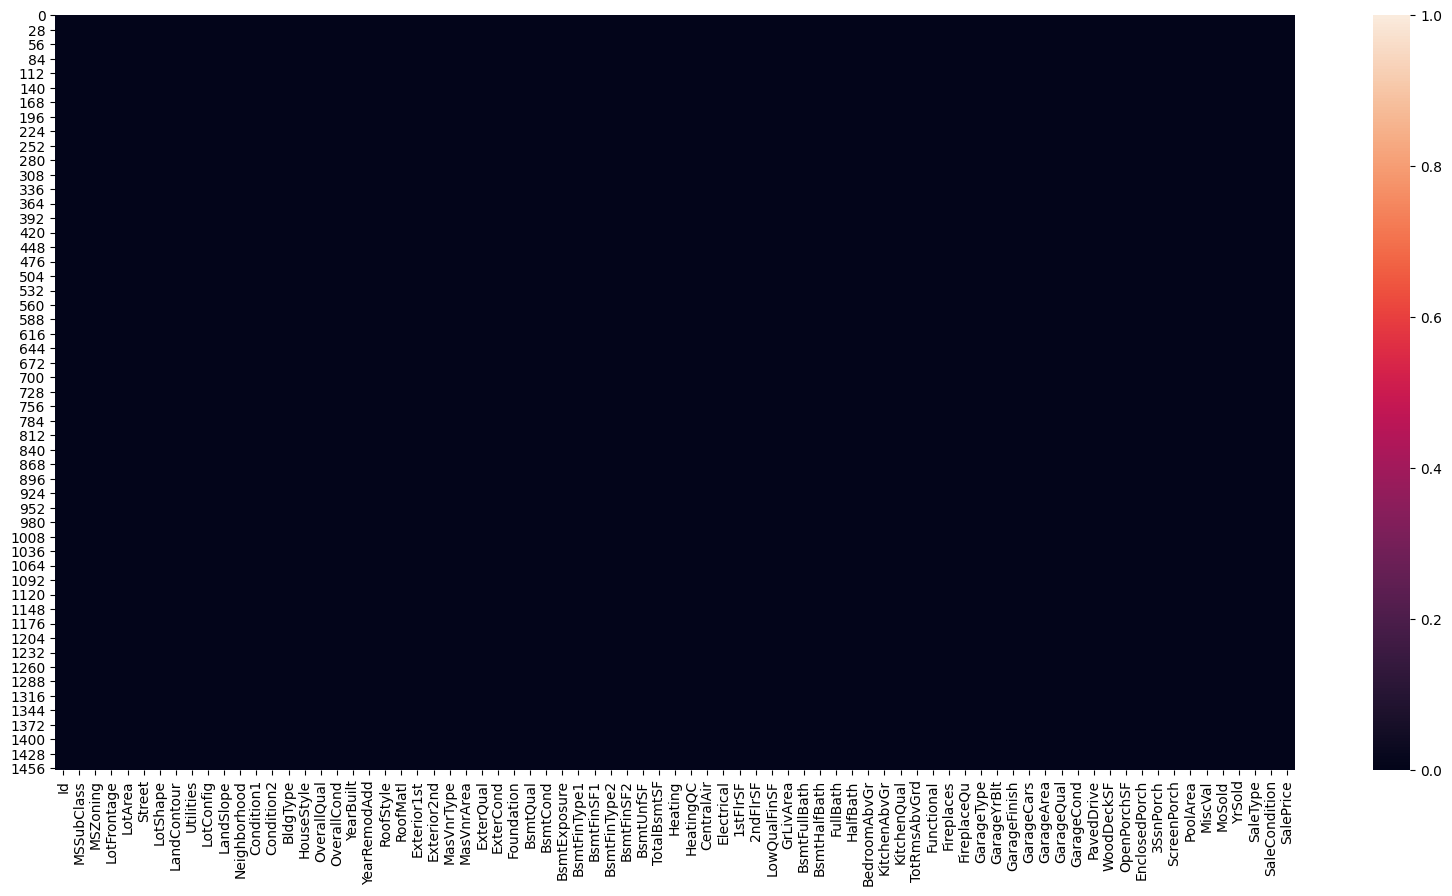

In [32]:
plt.figure(figsize=(20, 10), dpi=100)
sns.heatmap(train.isnull())

<AxesSubplot:>

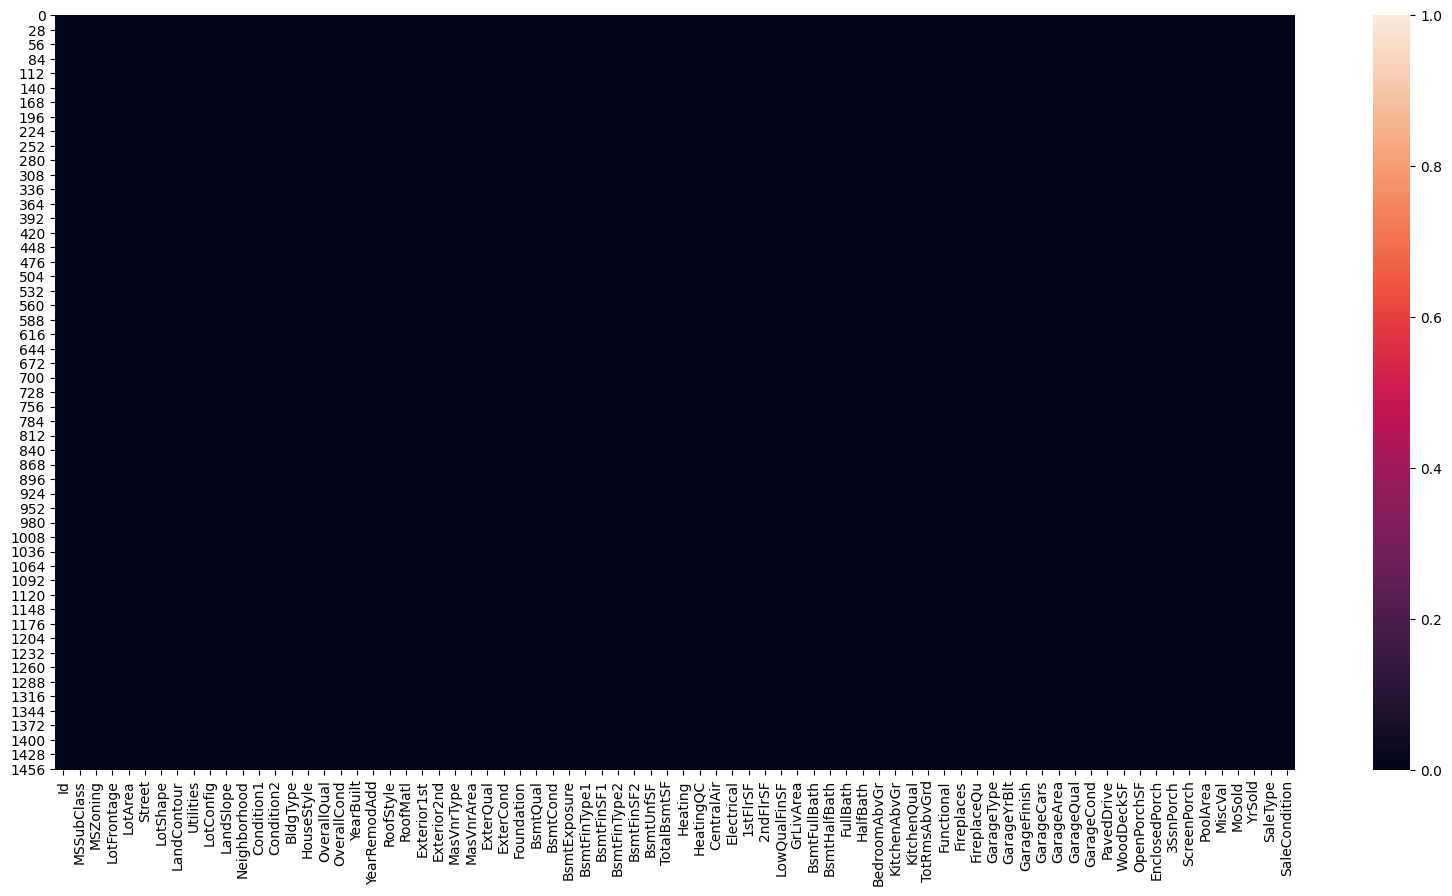

In [33]:
plt.figure(figsize=(20, 10), dpi=100)
sns.heatmap(test.isnull())

In [35]:
train.to_csv('clean_train.csv', index=False)
test.to_csv('clean_test.csv', index=False)